In [1]:
import functools
import itertools
import operator
from collections import defaultdict

import pandas as pd
import papermill as pm
import scrapbook as sb
from tqdm.auto import tqdm

In [1]:
gpts = (512, 1024, 2048, 4096)

In [3]:
parameters = (gpts,)
total = functools.reduce(operator.mul, tuple(len(p) for p in parameters))

for (n,) in tqdm(itertools.product(*parameters), total=total):
    pm.execute_notebook(
        "hrtem_benchmarks_template.ipynb",
        f"reports/hrtem_benchmarks_report-gpts={n}.ipynb",
        parameters=dict(gpts=n),
    )

  0%|          | 0/4 [00:00<?, ?it/s]

Executing:   0%|          | 0/10 [00:00<?, ?cell/s]

Executing:   0%|          | 0/10 [00:00<?, ?cell/s]

Executing:   0%|          | 0/10 [00:00<?, ?cell/s]

Executing:   0%|          | 0/10 [00:00<?, ?cell/s]

In [2]:
notebooks = sb.read_notebooks("reports").notebooks

index = []
data = defaultdict(list)
for nb in notebooks:
    index.append((nb.parameters["gpts"],))
    data["fftw.average"].append(nb.scraps.data_dict["fftw.average"])
    data["fftw.stdev"].append(nb.scraps.data_dict["fftw.stdev"])
    data["mkl.average"].append(nb.scraps.data_dict["mkl.average"])
    data["mkl.stdev"].append(nb.scraps.data_dict["mkl.stdev"])

index = pd.MultiIndex.from_tuples(index, names=["gpts"])
df = pd.DataFrame(data, index=index)
df = df.sort_index()

df

,fftw.average,fftw.stdev,mkl.average,mkl.stdev
gpts,,,,
512,0.238078,0.0,0.467500,0.0
1024,1.199323,0.0,1.769775,0.0
2048,15.283943,0.0,15.187852,0.0
4096,117.917805,0.0,116.899130,0.0


<AxesSubplot: xlabel='gpts'>

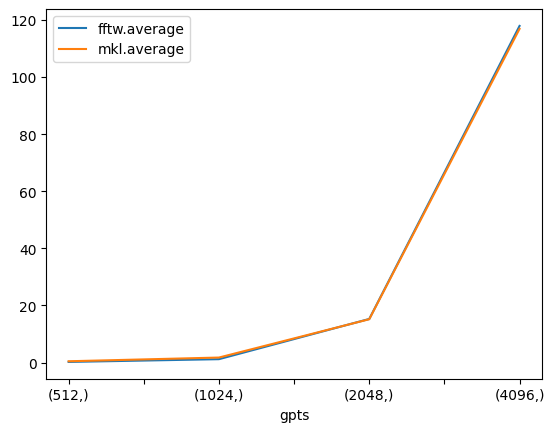

In [3]:
df[["fftw.average", "mkl.average"]].plot()